# Explore New York City Airbnb Data

This dataset describes the listing activity and metrics in NYC, NY for 2019.

source:

https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


The dataset has following features for each house listing

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")
print(df.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')


## Question: why do people book the airbnb listing?

use the number of reviews to estimate the number of times this listing was booked

* prefered neighbourhood/neighbourhood group?
* do people prefer hosts with more house listings?
* do people prefer less minimum stay nights?
* relationship between price and popularity for different room type

In [6]:
print(df['room_type'].unique())

['Private room' 'Entire home/apt' 'Shared room']


In [5]:
print("There are {} neighbourhoods in the data".format(len(df["neighbourhood"].unique())))
print("They are from neighbourhood groups : {}".format(df["neighbourhood_group"].unique()))

There are 221 neighbourhoods in the data
They are from neighbourhood groups : ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']


## neighbourhood

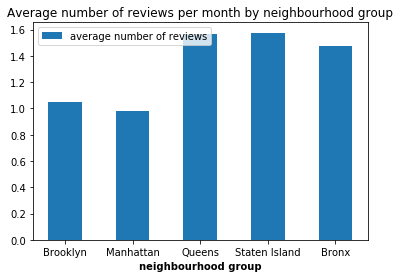

In [40]:
neighbourhood_group = df["neighbourhood_group"].unique()
bar = []
for g in neighbourhood_group:
    temp = df.loc[(df["neighbourhood_group"] == g)] 
    avg_reviews_per_month = temp["reviews_per_month"].fillna(0).mean()
    bar.append(avg_reviews_per_month)

# set width of bar
barWidth = 0.5
# set position
r = np.arange(len(bar))

# Make the plot
plt.bar(r, bar,width=barWidth,label="average number of reviews")
plt.title("Average number of reviews per month by neighbourhood group")
plt.xlabel('neighbourhood group', fontweight='bold')
plt.xticks([r for r in range(len(bar))], neighbourhood_group)

# Create legend & Show graphic
plt.legend()
plt.show()

In general, apartments in Queens, Staten Island, and Bronx are more popular than the listings in Brooklyn and Manhattan.



## room type
Then let's study the average number of reviews more closely, see which room types are more popular:

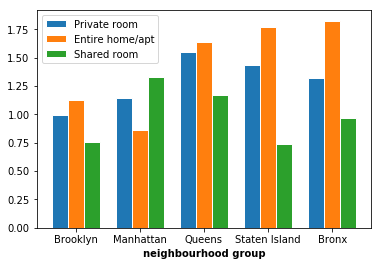

In [33]:
# average number of average reviews per month for each listing 
room_types = df['room_type'].unique()
neighbourhood_group = df["neighbourhood_group"].unique()
bars = []
for r in room_types:
    bar = []
    for g in neighbourhood_group:
        temp = df.loc[(df["neighbourhood_group"] == g) & (df['room_type']==r)] 
        avg_reviews_per_month = temp["reviews_per_month"].fillna(0).mean()
        bar.append(avg_reviews_per_month)
    bars.append(bar)

# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(bars[0]))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
rs = [r1,r2,r3]

# Make the plot
for i in range(len(bars)):
    bar = bars[i]
    plt.bar(rs[i], bar, width=barWidth, edgecolor='white', label=room_types[i])

# Add xticks on the middle of the group bars
plt.xlabel('neighbourhood group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars[0]))], neighbourhood_group)

    
# Create legend & Show graphic
plt.legend()
plt.show()


Plotting the average number of reviews the listings recieved every month, we could see that people have a different room-type preference when they are picking listings in different NYC neighbourhood.
some observations are:

* entire home/apt are generally more popular
* except in Manhattan, private room and shared room are more popular than entire home/apt
* private room is most popular in Queens, shared room is most popular in Manhattan, and entire home/apt are most popular in Bronx


## minimum nights stay

do people prefer less minimum nights stay?

In this part we only consider the short term stays, so ignore the listings with more than 40 minimum nights stay.

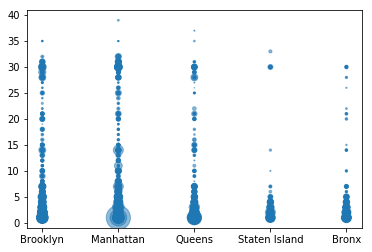

In [53]:
# ignore the ones requires > 40 minimum nights, only consider the short term stay here
temp = df.loc[df['minimum_nights']<40]
plt.scatter(temp['neighbourhood_group'], temp['minimum_nights'], s=temp['reviews_per_month']*10,alpha=0.5)
plt.show()

We could see in general the less minimum nights stay required, the more popular the listing. But there are some special cases when the minimums nights stay is around 30, for some people that will stay for at least a month, the minimum nights stay is not an issue, may also be more preferable since there are usually discounts for longer stay visitors.

## price

In general is it the case that the higher the price the lower the popularity?

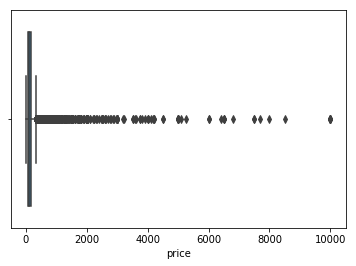

In [56]:
import seaborn as sns
sns.boxplot(df["price"])

In the data, the price for the listings varies from 0 to 10000.

For now we just want to look at the data from quantile 0.25-0.75

In [60]:
print(df["price"].quantile(0.25))
print(df["price"].quantile(0.75))

69.0
175.0


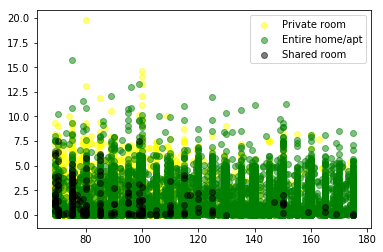

In [85]:
temp = df.loc[((df["price"] >= df["price"].quantile(0.25)) & 
              (df["price"] <= df["price"].quantile(0.75)) & 
               (df["reviews_per_month"]<30))]

room_types = list(temp['room_type'].unique())

t0 = temp[temp["room_type"]==room_types[0]]
t1 = temp[temp["room_type"]==room_types[1]]
t2 = temp[temp["room_type"]==room_types[2]]

fig, ax = plt.subplots()
ax.scatter(t0["price"], t0["reviews_per_month"], c="yellow",label=room_types[0],alpha=0.5)
ax.scatter(t1["price"], t1["reviews_per_month"], c="green",label=room_types[1],alpha=0.5)
ax.scatter(t2["price"], t2["reviews_per_month"], c="black",label=room_types[2],alpha=0.5)

ax.legend()
plt.show()


There is no clear evidence to support the conculsion that the higher the price the lower the popularity.